In [3]:
# load important packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib notebook


In [4]:
# load datset and check if the dataset has right type of data
df = pd.read_csv('BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
X = pd.DataFrame(np.c_[df['RM'],df['LSTAT']], columns = ['RM','LSTAT'])
Y = df.MEDV


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state=5)


In [7]:
Regression_Model = LinearRegression()
Regression_Model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# y_train_predict = Regression_Model.predict(X_train)
# rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# # r2 = r2(Y_train, y_train_predict)

# print("The model performance for training set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# # print('R2 score is {}'.format(r2))
# print("\n")

# # model evaluation for testing set
# y_test_predict = Regression_Model.predict(X_test)
# rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# # r2 = r2_score(Y_test, y_test_predict)

# print("The model performance for testing set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))

In [9]:
# Y_Predict = Regression_Model.predict(X)
# Y_Predict= np.array(Y_Predict)

In [8]:
x_surf,y_surf=np.meshgrid(np.linspace(X.RM.min(),X.RM.max(),506),np.linspace(X.LSTAT.min(),X.LSTAT.max(),506))
modX = pd.DataFrame({'RM': x_surf.ravel(),'LSTAT': y_surf.ravel()})
Y_Predict = Regression_Model.predict(modX)
Y_Predict= np.array(Y_Predict)


In [13]:
Y_predict = Regression_Model.predict(X)




{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [14]:
Regression_Model.coef_

array([ 4.58938833, -0.71722954])

<IPython.core.display.Javascript object>


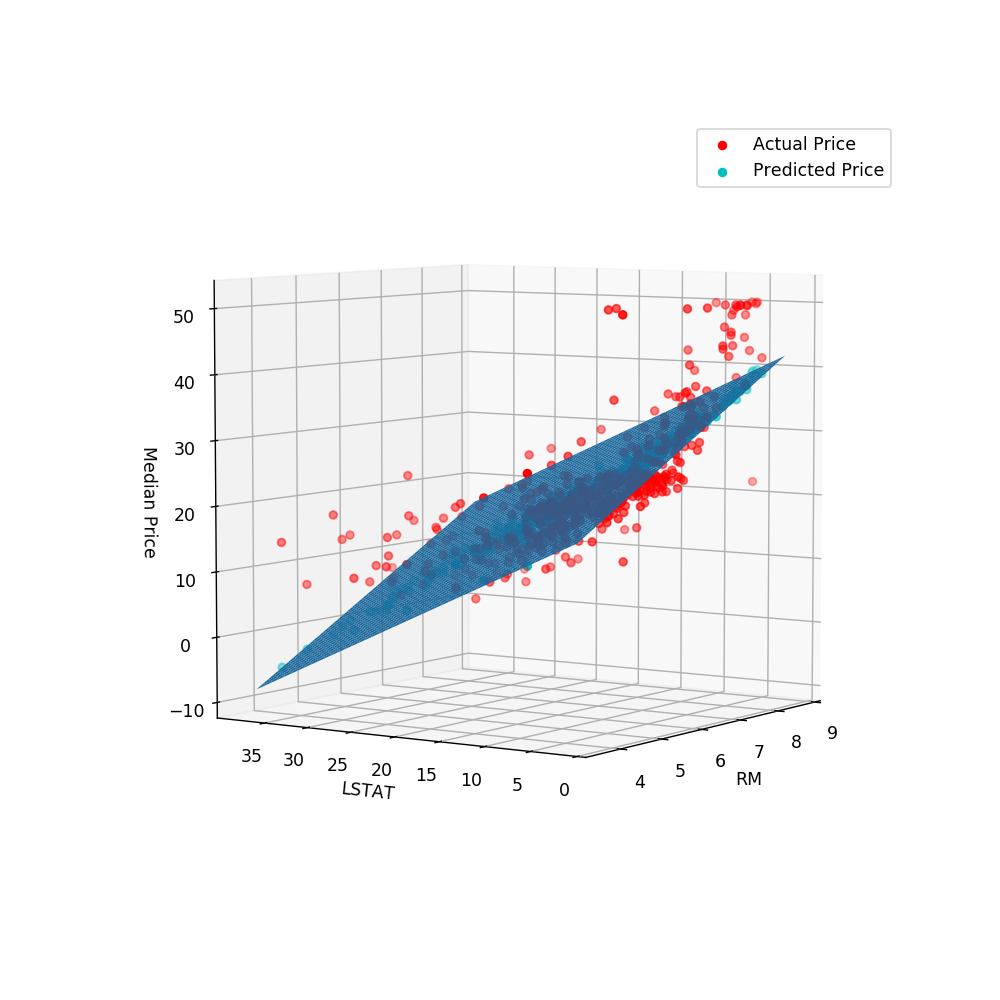

In [64]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X.RM,X.LSTAT,Y,c='r',label='Actual Price')
ax.scatter(X.RM,X.LSTAT,Y_predict,c='c',label='Predicted Price')
Axes3D.plot_surface(ax,x_surf,y_surf,Y_Predict.reshape(x_surf.shape))
ax.set_zlabel('Median Price')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.legend()
plt.show()




[]
